# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

## Create Functions

In [2]:
# get hist graph from df
def histGraph(df,col,title,ptltitle,y1,x1,name):
    df[col].value_counts().plot(kind='bar',title=title,figsize=(16,9))
    plt.title(ptltitle + name + ')')
    plt.ylabel(y1)
    plt.xlabel(x1)
    plt.show()
# Get correlcation from df
def corr(df):
    plt.figure(figsize=(16,6))
    sns.heatmap(df.corr(),vmin=1,vmax=1,annot=True,cmap='BrBG')
    plt.show()

# Import File

In [3]:
df = pd.read_csv('top50.csv', encoding = 'unicode_escape')

## Column Names

In [4]:
list(df.columns)

['Unnamed: 0',
 'Track.Name',
 'Artist.Name',
 'Genre',
 'Beats.Per.Minute',
 'Energy',
 'Danceability',
 'Loudness..dB..',
 'Liveness',
 'Valence.',
 'Length.',
 'Acousticness..',
 'Speechiness.',
 'Popularity']

In [5]:
# Rename columns and Set Unnamed column to index
df = df.rename(columns={'Unnamed: 0':'index','Track.Name':'Track_Name','Artist.Name':'Artist_Name', \
 'Beats.Per.Minute':'Beats_Per_Minute','Loudness..dB..':'Loudness_dB','Valence.':'Valence','Length.':'Length', \
 'Acousticness..':'Acousticness','Speechiness.':'Speechiness'})
df = df.set_index('index')

In [6]:
list(df.columns)

['Track_Name',
 'Artist_Name',
 'Genre',
 'Beats_Per_Minute',
 'Energy',
 'Danceability',
 'Loudness_dB',
 'Liveness',
 'Valence',
 'Length',
 'Acousticness',
 'Speechiness',
 'Popularity']

## Sample Data

In [7]:
df.head()

,Track_Name,Artist_Name,Genre,Beats_Per_Minute,Energy,Danceability,Loudness_dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
index,,,,,,,,,,,,,
1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


## Number of Records (columns, rows)

In [8]:
df.shape

(50, 13)

## Data Types

In [9]:
df.dtypes

Track_Name          object
Artist_Name         object
Genre               object
Beats_Per_Minute     int64
Energy               int64
Danceability         int64
Loudness_dB          int64
Liveness             int64
Valence              int64
Length               int64
Acousticness         int64
Speechiness          int64
Popularity           int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Track_Name        50 non-null     object
 1   Artist_Name       50 non-null     object
 2   Genre             50 non-null     object
 3   Beats_Per_Minute  50 non-null     int64 
 4   Energy            50 non-null     int64 
 5   Danceability      50 non-null     int64 
 6   Loudness_dB       50 non-null     int64 
 7   Liveness          50 non-null     int64 
 8   Valence           50 non-null     int64 
 9   Length            50 non-null     int64 
 10  Acousticness      50 non-null     int64 
 11  Speechiness       50 non-null     int64 
 12  Popularity        50 non-null     int64 
dtypes: int64(10), object(3)
memory usage: 5.5+ KB


## Numeric Description

In [11]:
df.describe(include=[np.number])

,Beats_Per_Minute,Energy,Danceability,Loudness_dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


## Categorical Description

In [12]:
df.describe(include=['O'])

,Track_Name,Artist_Name,Genre
count,50,50,50
unique,50,38,21
top,Señorita,Ed Sheeran,dance pop
freq,1,4,8


In [13]:
# Set Aritist Name and Genre to category
df['Genre'] = df['Genre'].astype('category')
df['Artist_Name'] = df['Artist_Name'].astype('category')
# Set int to float
df = df.astype({"Beats_Per_Minute":'float', "Loudness_dB":'float', "Valence":'float', "Length":'float', \
               "Acousticness":'float',"Speechiness":'float'})

In [14]:
df.dtypes

Track_Name            object
Artist_Name         category
Genre               category
Beats_Per_Minute     float64
Energy                 int64
Danceability           int64
Loudness_dB          float64
Liveness               int64
Valence              float64
Length               float64
Acousticness         float64
Speechiness          float64
Popularity             int64
dtype: object

## Null Values

In [15]:
df.isnull().sum()

Track_Name          0
Artist_Name         0
Genre               0
Beats_Per_Minute    0
Energy              0
Danceability        0
Loudness_dB         0
Liveness            0
Valence             0
Length              0
Acousticness        0
Speechiness         0
Popularity          0
dtype: int64

## Duplicates

In [16]:
df[df.duplicated()].count()

Track_Name          0
Artist_Name         0
Genre               0
Beats_Per_Minute    0
Energy              0
Danceability        0
Loudness_dB         0
Liveness            0
Valence             0
Length              0
Acousticness        0
Speechiness         0
Popularity          0
dtype: int64

## Unique Count

In [17]:
df.nunique()

Track_Name          50
Artist_Name         38
Genre               21
Beats_Per_Minute    31
Energy              31
Danceability        29
Loudness_dB          9
Liveness            22
Valence             39
Length              44
Acousticness        35
Speechiness         24
Popularity          18
dtype: int64

## Histograms

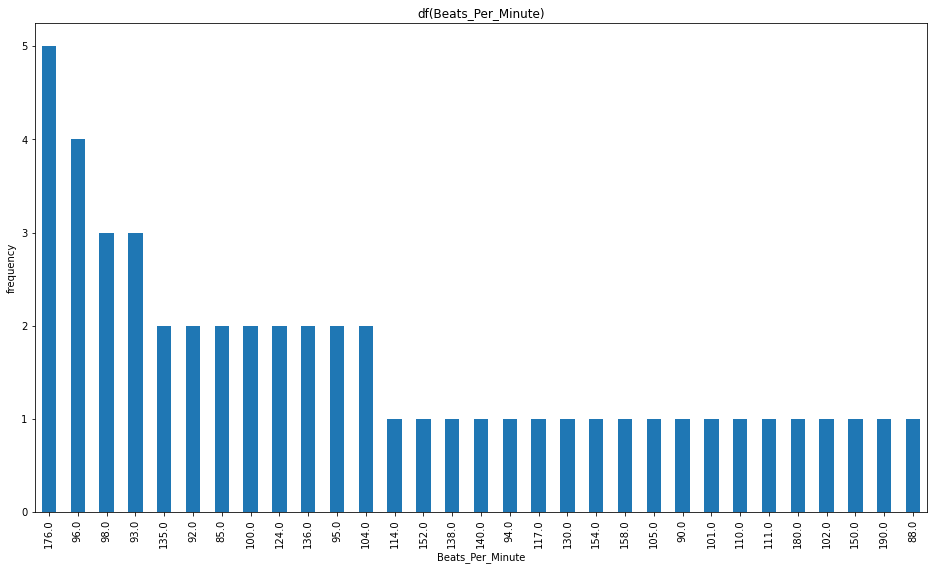

In [18]:
histGraph(df,'Beats_Per_Minute','Beats_Per_Minute','df(','frequency','Beats_Per_Minute','Beats_Per_Minute')

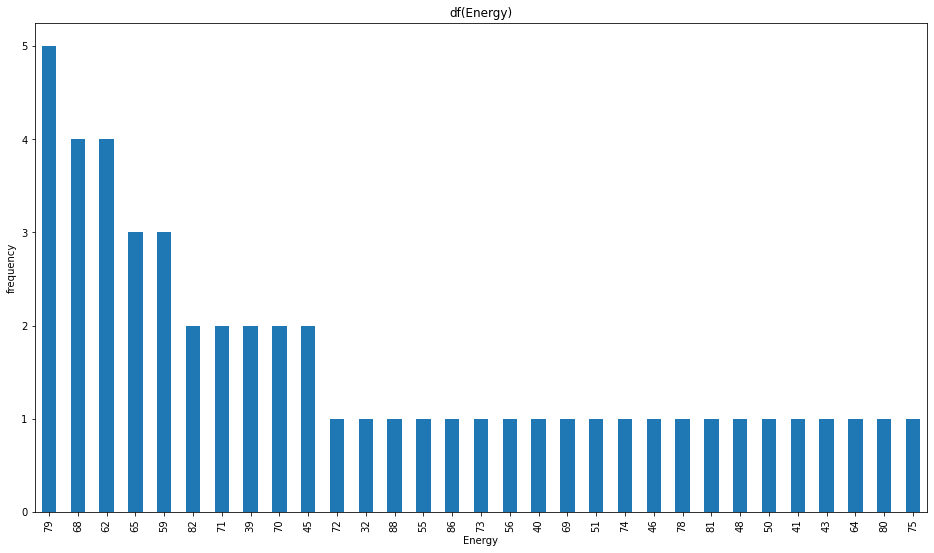

In [19]:
histGraph(df,'Energy','Energy','df(','frequency','Energy','Energy')

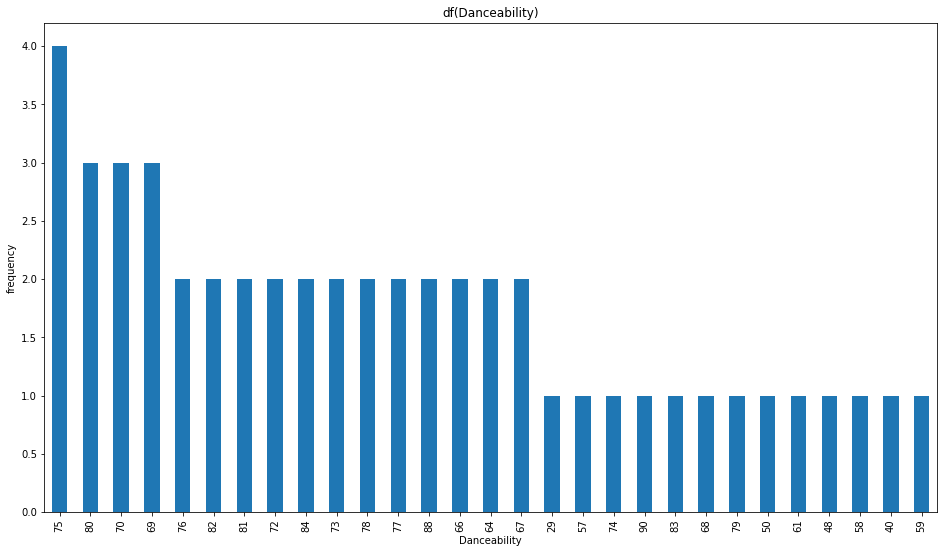

In [20]:
histGraph(df,'Danceability','Danceability','df(','frequency','Danceability','Danceability')

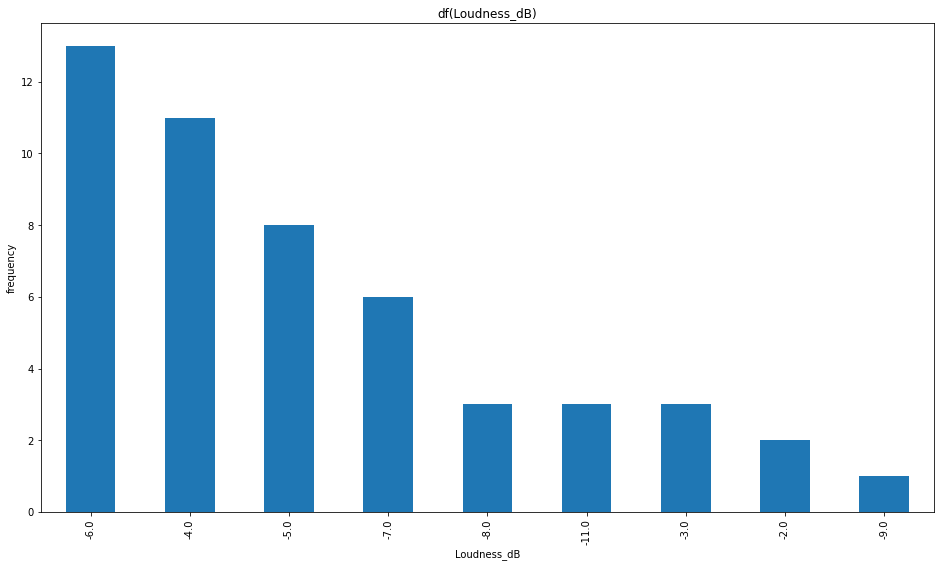

In [21]:
histGraph(df,'Loudness_dB','Loudness_dB','df(','frequency','Loudness_dB','Loudness_dB')

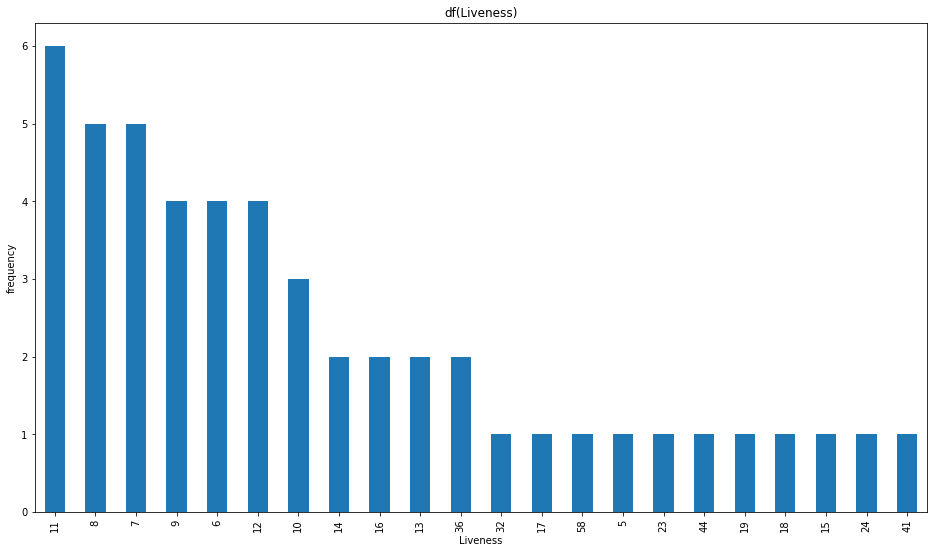

In [22]:
histGraph(df,'Liveness','Liveness','df(','frequency','Liveness','Liveness')

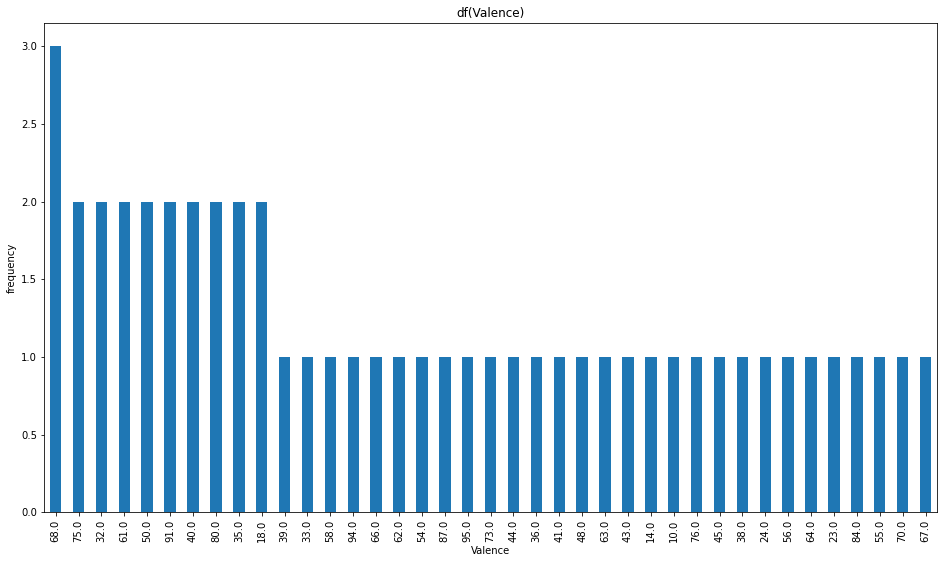

In [23]:
histGraph(df,'Valence','Valence','df(','frequency','Valence','Valence')

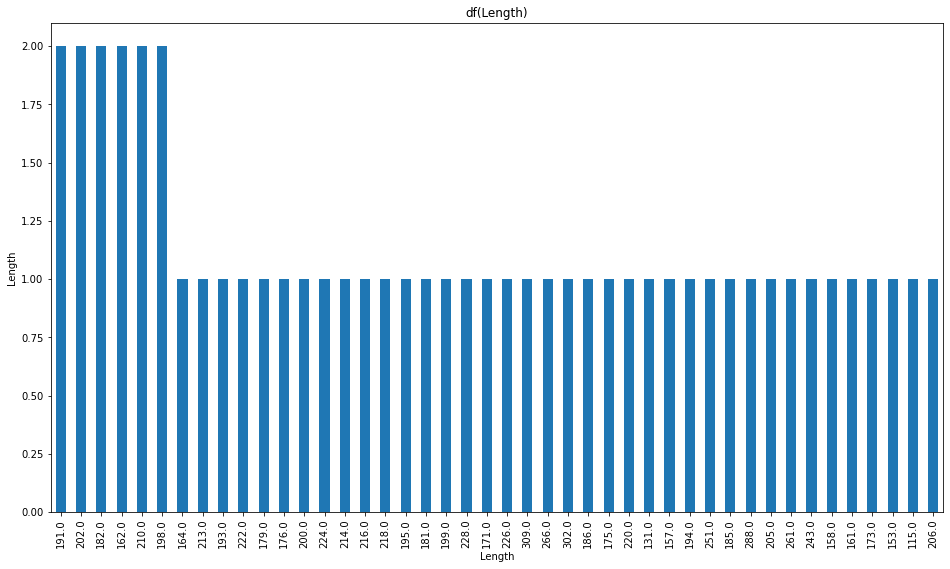

In [24]:
histGraph(df,'Length','Length','df(','Length','Length','Length')

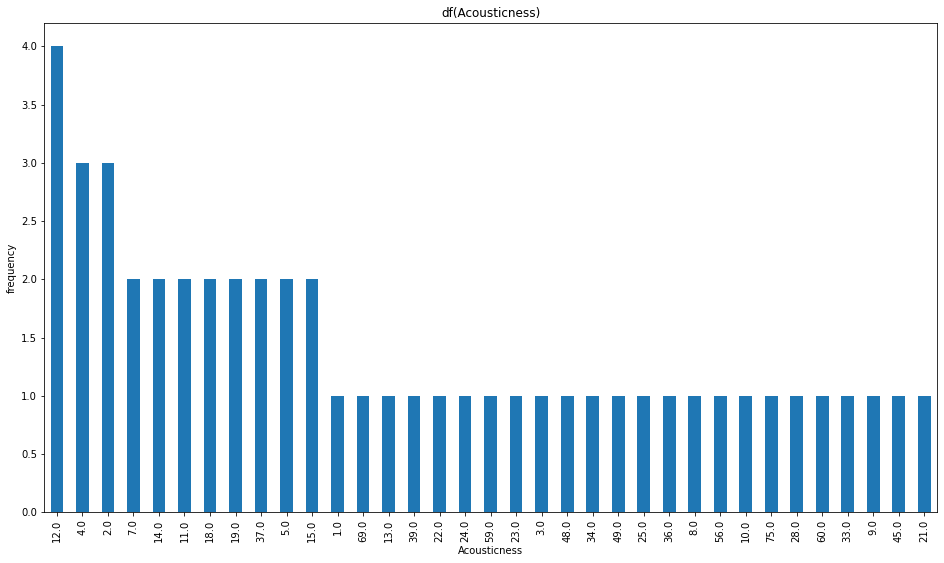

In [25]:
histGraph(df,'Acousticness','Acousticness','df(','frequency','Acousticness','Acousticness')

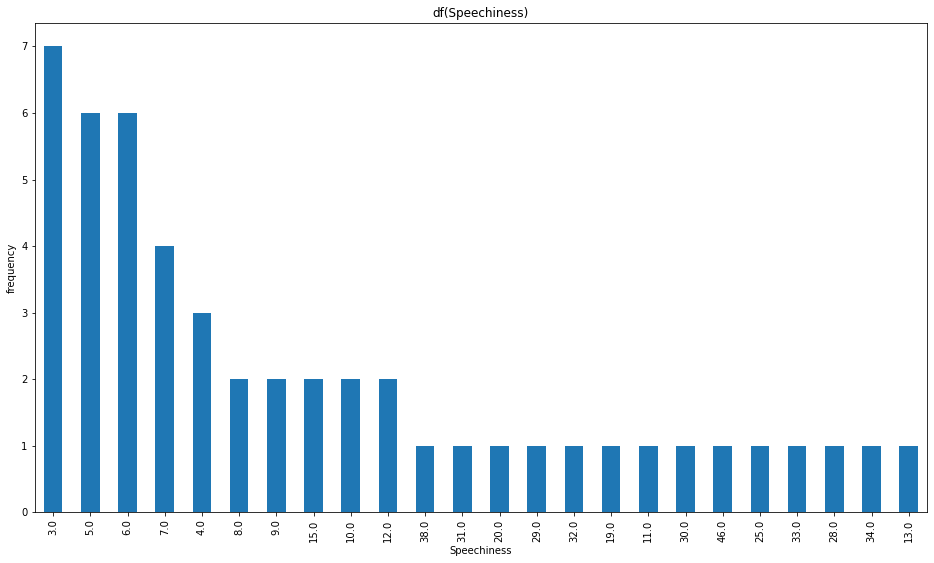

In [26]:
histGraph(df,'Speechiness','Speechiness','df(','frequency','Speechiness','Speechiness')

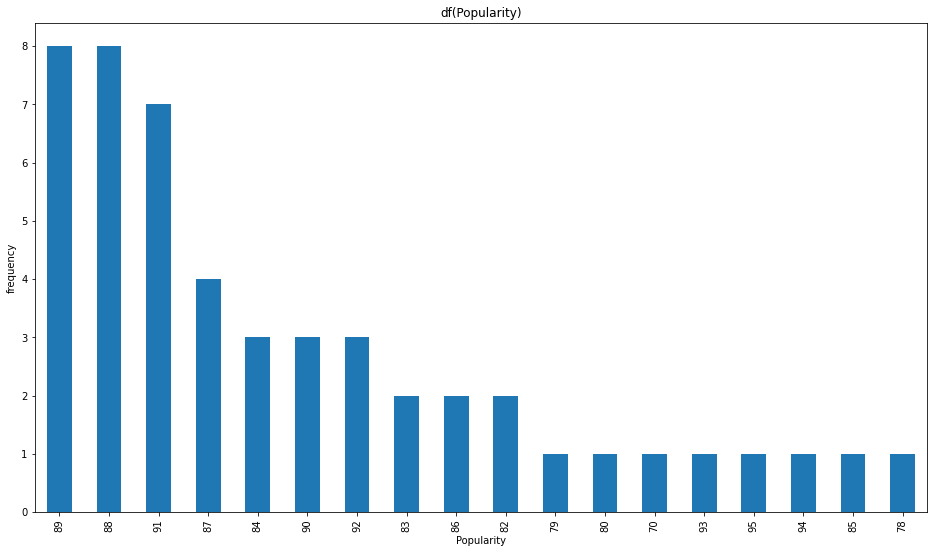

In [27]:
histGraph(df,'Popularity','Popularity','df(','frequency','Popularity','Popularity')

## Outliers

In [28]:
# Calculate Outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

Beats_Per_Minute    41.50
Energy              19.50
Danceability        12.75
Loudness_dB          2.75
Liveness             7.75
Valence             31.25
Length              40.75
Acousticness        25.50
Speechiness         10.00
Popularity           4.75
dtype: float64

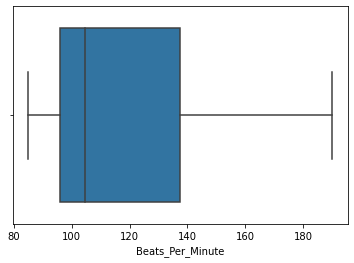

In [29]:
sns.boxplot(x=df['Beats_Per_Minute'])
plt.show()

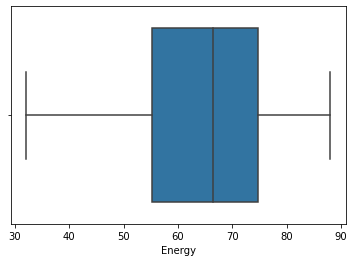

In [30]:
sns.boxplot(x=df['Energy'])
plt.show()

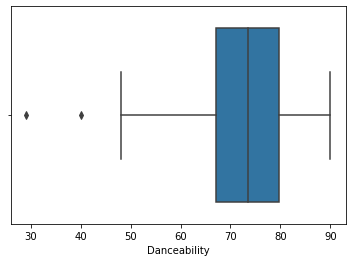

In [31]:
sns.boxplot(x=df['Danceability'])
plt.show()

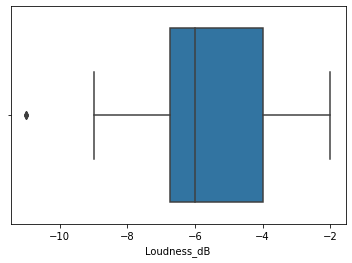

In [32]:
sns.boxplot(x=df['Loudness_dB'])
plt.show()

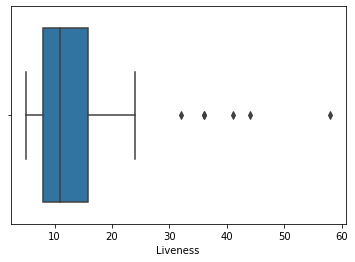

In [33]:
sns.boxplot(x=df['Liveness'])
plt.show()

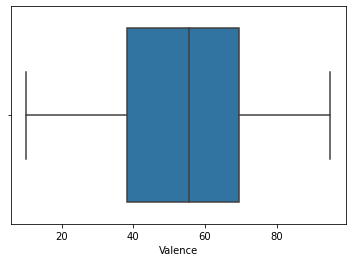

In [34]:
sns.boxplot(x=df['Valence'])
plt.show()

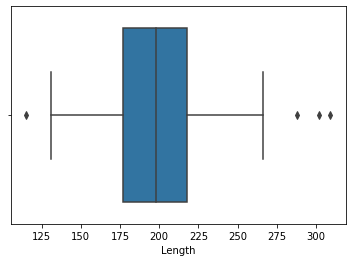

In [35]:
sns.boxplot(x=df['Length'])
plt.show()

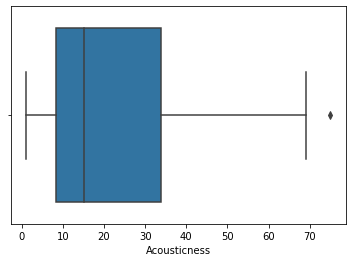

In [36]:
sns.boxplot(x=df['Acousticness'])
plt.show()

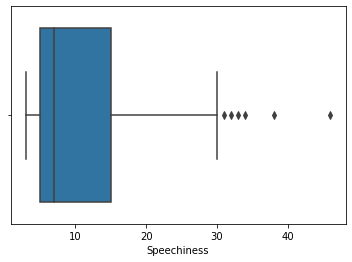

In [37]:
sns.boxplot(x=df['Speechiness'])
plt.show()

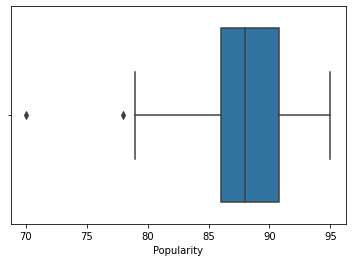

In [38]:
sns.boxplot(x=df['Popularity'])
plt.show()

## Correlation

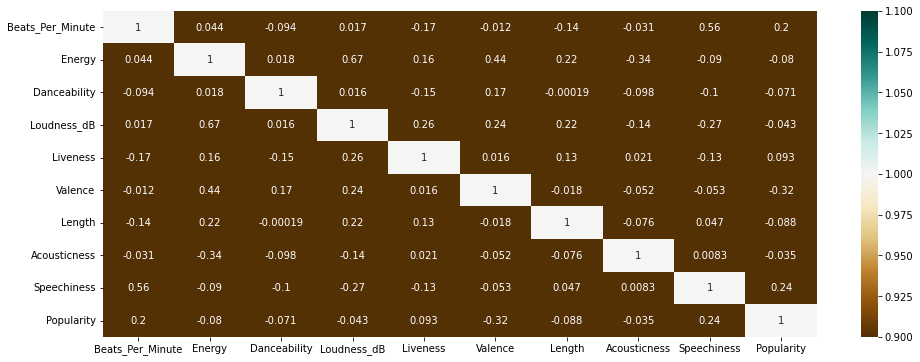

In [39]:
corr(df)

In [40]:
df.corr()

,Beats_Per_Minute,Energy,Danceability,Loudness_dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
Beats_Per_Minute,1.000000,0.043756,-0.094183,0.017016,-0.167286,-0.011586,-0.139288,-0.031450,0.557052,0.196097
Energy,0.043756,1.000000,0.018254,0.670794,0.162768,0.438820,0.224677,-0.339892,-0.089860,-0.080295
Danceability,-0.094183,0.018254,1.000000,0.016255,-0.149636,0.172829,-0.000185,-0.098165,-0.103472,-0.071413
Loudness_dB,0.017016,0.670794,0.016255,1.000000,0.258652,0.237614,0.219219,-0.138300,-0.272213,-0.043085
Liveness,-0.167286,0.162768,-0.149636,0.258652,1.000000,0.016123,0.131782,0.021328,-0.125286,0.092564
Valence,-0.011586,0.438820,0.172829,0.237614,0.016123,1.000000,-0.017782,-0.052323,-0.053242,-0.317752
Length,-0.139288,0.224677,-0.000185,0.219219,0.131782,-0.017782,1.000000,-0.076293,0.046755,-0.087639
Acousticness,-0.031450,-0.339892,-0.098165,-0.138300,0.021328,-0.052323,-0.076293,1.000000,0.008293,-0.034684
Speechiness,0.557052,-0.089860,-0.103472,-0.272213,-0.125286,-0.053242,0.046755,0.008293,1.000000,0.238553
Popularity,0.196097,-0.080295,-0.071413,-0.043085,0.092564,-0.317752,-0.087639,-0.034684,0.238553,1.000000


## Distubution

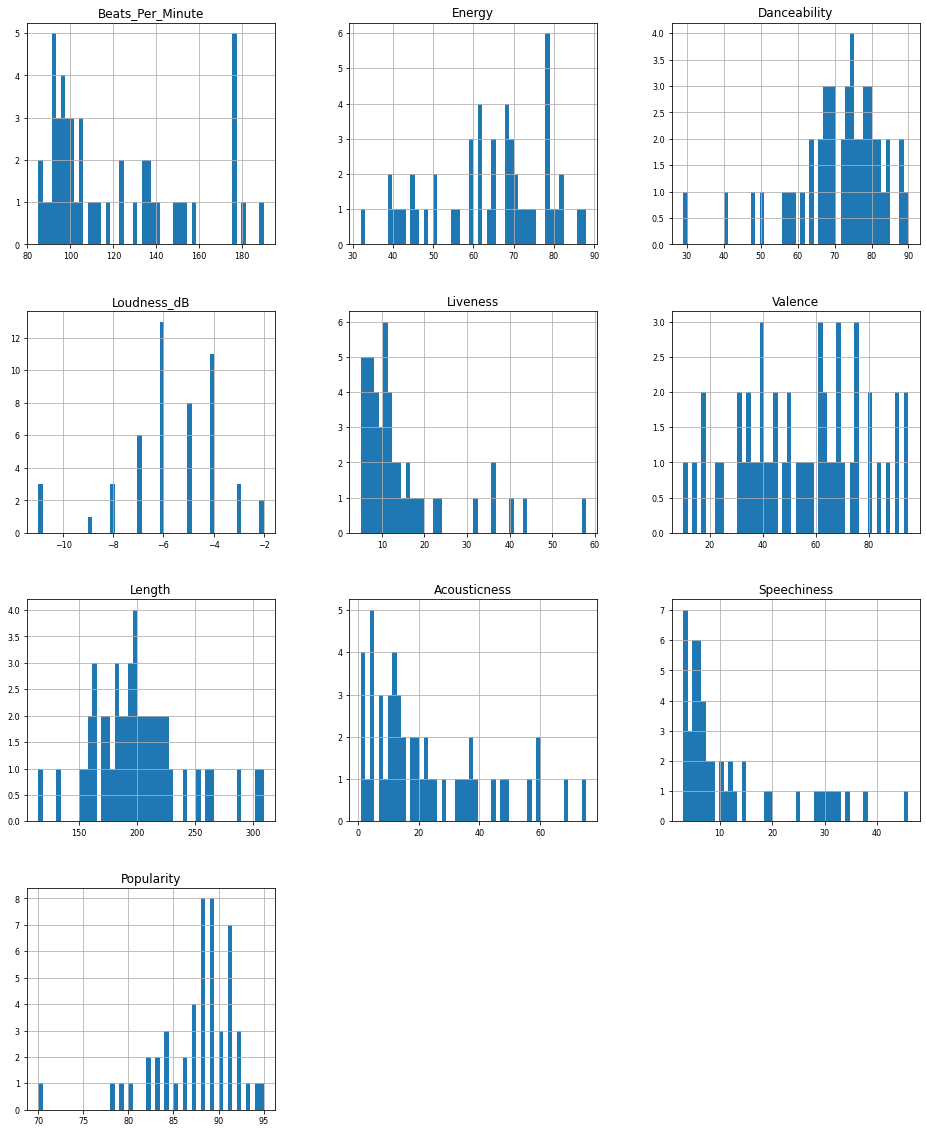

In [41]:
list(set(df.dtypes.tolist()))
df_num = df.select_dtypes(include = ['float64','int64'])
df_num.head()
df_num.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8);
plt.show()

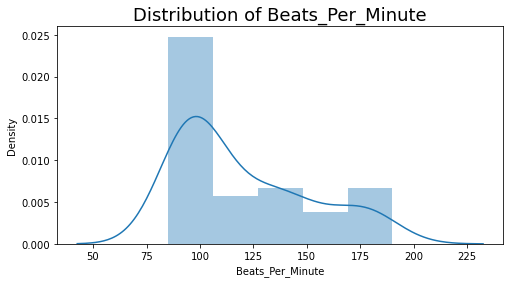

In [42]:
# Plotting Beats_Per_Minute
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Beats_Per_Minute', fontsize=18)
sns.distplot(df['Beats_Per_Minute'])
plt.show()

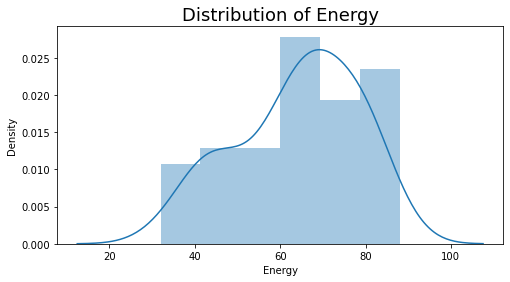

In [43]:
# Plotting Energy
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Energy', fontsize=18)
sns.distplot(df['Energy'])
plt.show()

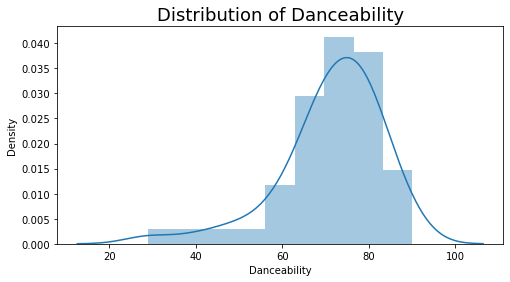

In [44]:
# Plotting Danceability
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Danceability', fontsize=18)
sns.distplot(df['Danceability'])
plt.show()

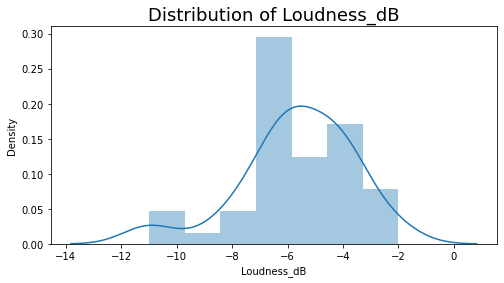

In [45]:
# Plotting Loudness_dB
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Loudness_dB', fontsize=18)
sns.distplot(df['Loudness_dB'])
plt.show()

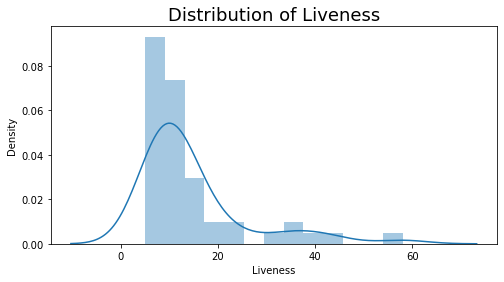

In [46]:
# Plotting Liveness
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Liveness', fontsize=18)
sns.distplot(df['Liveness'])
plt.show()

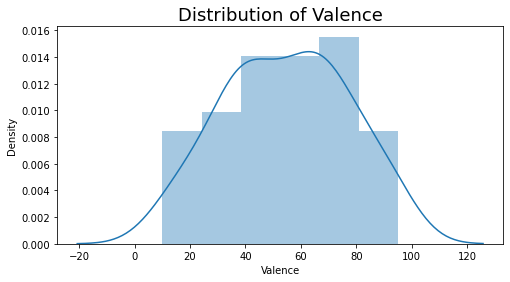

In [47]:
# Plotting Valence
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Valence', fontsize=18)
sns.distplot(df['Valence'])
plt.show()

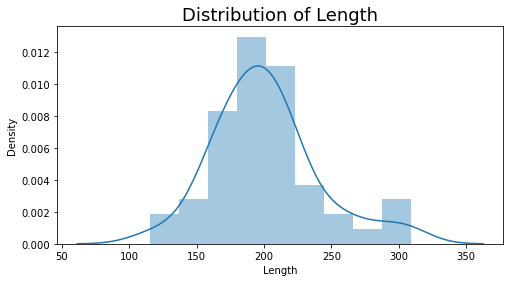

In [48]:
# Plotting Length
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Length', fontsize=18)
sns.distplot(df['Length'])
plt.show()

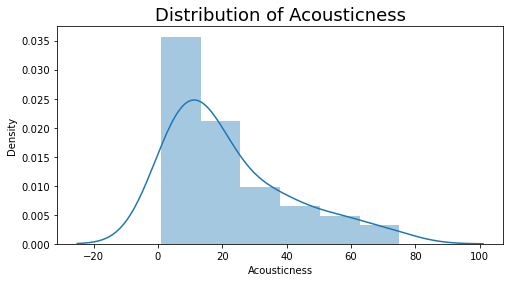

In [49]:
# Plotting Acousticness
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Acousticness', fontsize=18)
sns.distplot(df['Acousticness'])
plt.show()

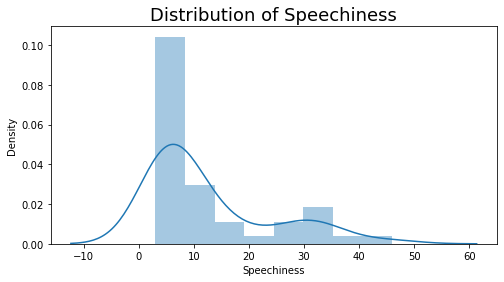

In [50]:
# Plotting Speechiness
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Speechiness', fontsize=18)
sns.distplot(df['Speechiness'])
plt.show()

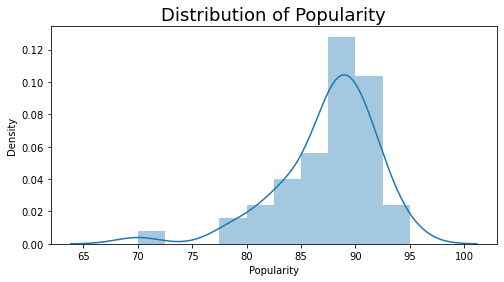

In [51]:
# Plotting Popularity
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Popularity', fontsize=18)
sns.distplot(df['Popularity'])
plt.show()

## Normalize Data - Popularity will be considered our Target Variable

In [52]:
sc = StandardScaler()
num = ['Beats_Per_Minute','Energy','Danceability','Loudness_dB','Liveness','Valence','Length','Acousticness','Speechiness']
df[num] = sc.fit_transform(df[num])

In [53]:
df.head()

,Track_Name,Artist_Name,Genre,Beats_Per_Minute,Energy,Danceability,Loudness_dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
index,,,,,,,,,,,,,
1,Señorita,Shawn Mendes,canadian pop,-0.100040,-0.643061,0.391195,-0.167012,-0.605094,0.922595,-0.257029,-0.965719,-0.857964,79
2,China,Anuel AA,reggaeton flow,-0.492352,1.202367,0.645217,0.815412,-0.605094,0.289442,2.607453,-0.753006,-0.314949,92
3,boyfriend (with Social House),Ariana Grande,dance pop,2.286529,1.131389,-2.657075,0.815412,0.121746,0.696469,-0.386060,-0.540292,3.033644,85
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,-0.884665,0.066719,-0.624895,-1.149437,-0.605094,0.018090,-0.076386,-0.540292,0.590076,86
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,0.978820,0.066719,-1.132940,0.815412,-0.332529,-1.655245,-0.669927,1.214594,-0.495954,94


## Linear Regression

In [54]:
#X = df[num].values

In [55]:
#y = df['Popularity'].values

In [56]:
X = df.iloc[:, 3:-1].values
X

array([[-0.10003973, -0.64306057,  0.3911946 , -0.16701216, -0.6050936 ,
         0.92259536, -0.25702919, -0.96571922, -0.85796387],
       [-0.4923524 ,  1.20236711,  0.64521708,  0.81541229, -0.6050936 ,
         0.28944168,  2.6074527 , -0.75300573, -0.31494876],
       [ 2.28652901,  1.13138912, -2.65707504,  0.81541229,  0.12174556,
         0.69646905, -0.3860599 , -0.54029225,  3.03364442],
       [-0.88466507,  0.06671931, -0.62489528, -1.14943661, -0.6050936 ,
         0.01809011, -0.07638618, -0.54029225,  0.59007642],
       [ 0.97882011,  0.06671931, -1.13294022,  0.81541229, -0.33252891,
        -1.65524462, -0.66992748,  1.21459399, -0.4959538 ],
       [-0.59043057,  0.27965327,  0.72989123,  0.32420007, -0.5142387 ,
         1.32962272,  0.49134897, -0.69982736, -0.76746136],
       [ 1.95960178, -0.00425868,  0.30652045, -0.16701216, -0.69594849,
        -1.4291183 , -1.80539777, -1.07207596,  1.4951016 ],
       [-0.29619607,  0.27965327, -1.97968179,  0.32420007, -0

In [57]:
y = df.iloc[:, -1].values
y

array([79, 92, 85, 86, 94, 84, 92, 90, 87, 95, 93, 86, 88, 87, 92, 82, 90,
       91, 88, 91, 91, 91, 83, 91, 89, 70, 83, 89, 91, 89, 84, 89, 89, 89,
       89, 89, 91, 87, 80, 78, 88, 90, 87, 84, 88, 88, 88, 88, 88, 82],
      dtype=int64)

In [58]:
print(X.shape)
print(y.shape)

(50, 9)
(50,)


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [60]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [61]:
# Prediction of test set
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
# Predicted values
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
print("Prediction for test set: {}".format(y_pred))

[[85.72 91.  ]
 [87.34 86.  ]
 [91.76 93.  ]
 [85.21 90.  ]
 [93.89 85.  ]
 [85.91 89.  ]
 [85.44 80.  ]
 [89.86 89.  ]
 [84.4  83.  ]
 [88.86 94.  ]]
Prediction for test set: [85.72 87.34 91.76 85.21 93.89 85.91 85.44 89.86 84.4  88.86]


In [62]:
# Intercept and Coefficient
print("Intercept: ", regressor.intercept_)
print("Coefficients:")
list(zip(X, regressor.coef_))

Intercept:  87.46798172224713
Coefficients:


[(array([-0.1 , -0.64,  0.39, -0.17, -0.61,  0.92, -0.26, -0.97, -0.86]),
  0.5350269513036284),
 (array([-0.49,  1.2 ,  0.65,  0.82, -0.61,  0.29,  2.61, -0.75, -0.31]),
  -0.021140686949733166),
 (array([ 2.29,  1.13, -2.66,  0.82,  0.12,  0.7 , -0.39, -0.54,  3.03]),
  -0.09391974181820353),
 (array([-0.88,  0.07, -0.62, -1.15, -0.61,  0.02, -0.08, -0.54,  0.59]),
  0.3545915540253154),
 (array([ 0.98,  0.07, -1.13,  0.82, -0.33, -1.66, -0.67,  1.21, -0.5 ]),
  0.8020855021756538),
 (array([-0.59,  0.28,  0.73,  0.32, -0.51,  1.33,  0.49, -0.7 , -0.77]),
  -1.0261766728544932),
 (array([ 1.96, -0.  ,  0.31, -0.17, -0.7 , -1.43, -1.81, -1.07,  1.5 ]),
  -0.575697539858126),
 (array([-0.3 ,  0.28, -1.98,  0.32, -0.61, -0.89,  0.03, -0.38, -0.31]),
  -0.4572731353590113),
 (array([ 0.52, -0.15,  1.41, -0.17, -0.33,  0.43, -1.13, -0.91, -0.22]),
  1.5936439954677892)]

In [63]:
# Actual value and the predicted Value
r_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
r_diff.head()

,Actual value,Predicted value
0,91,85.716600
1,86,87.341298
2,93,91.755349
3,90,85.213585
4,85,93.892922


## Evaluating the Model

In [64]:
# model Evaluation
from sklearn import metrics
meanErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


In [66]:
print('R squared: {:.2f}'.format(regressor.score(X,y)*100))
print('Mean Absolute Error:', meanErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 15.57
Mean Absolute Error: 3.7483345242163013
Mean Square Error: 20.156940920031033
Root Mean Square Error: 4.489648195575131
